In [4]:
import pandas as pd
from nltk.corpus import stopwords

In [5]:
df = pd.read_csv('bbc-news-data.csv', sep='\t')
df

,category,filename,title,content
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...
...,...,...,...,...
2220,tech,397.txt,BT program to beat dialler scams,BT is introducing two initiatives to help bea...
2221,tech,398.txt,Spam e-mails tempt net shoppers,Computer users across the world continue to i...
2222,tech,399.txt,Be careful how you code,A new European directive could put software w...
2223,tech,400.txt,US cyber security chief resigns,The man making sure US computer networks are ...


In [6]:
from sklearn import preprocessing
import numpy as np
le = preprocessing.LabelEncoder()
le.fit(df.category)
lec = le.transform(df.category)

df.category = lec
df.title = df.title.str.lower()
df.content = df.content.str.lower()
df

,category,filename,title,content
0,0,001.txt,ad sales boost time warner profit,quarterly profits at us media giant timewarne...
1,0,002.txt,dollar gains on greenspan speech,the dollar has hit its highest level against ...
2,0,003.txt,yukos unit buyer faces loan claim,the owners of embattled russian oil giant yuk...
3,0,004.txt,high fuel prices hit ba's profits,british airways has blamed high fuel prices f...
4,0,005.txt,pernod takeover talk lifts domecq,shares in uk drinks and food firm allied dome...
...,...,...,...,...
2220,4,397.txt,bt program to beat dialler scams,bt is introducing two initiatives to help bea...
2221,4,398.txt,spam e-mails tempt net shoppers,computer users across the world continue to i...
2222,4,399.txt,be careful how you code,a new european directive could put software w...
2223,4,400.txt,us cyber security chief resigns,the man making sure us computer networks are ...


In [7]:
le.classes_

array(['business', 'entertainment', 'politics', 'sport', 'tech'],
      dtype=object)

In [8]:
df

,category,filename,title,content
0,0,001.txt,ad sales boost time warner profit,quarterly profits at us media giant timewarne...
1,0,002.txt,dollar gains on greenspan speech,the dollar has hit its highest level against ...
2,0,003.txt,yukos unit buyer faces loan claim,the owners of embattled russian oil giant yuk...
3,0,004.txt,high fuel prices hit ba's profits,british airways has blamed high fuel prices f...
4,0,005.txt,pernod takeover talk lifts domecq,shares in uk drinks and food firm allied dome...
...,...,...,...,...
2220,4,397.txt,bt program to beat dialler scams,bt is introducing two initiatives to help bea...
2221,4,398.txt,spam e-mails tempt net shoppers,computer users across the world continue to i...
2222,4,399.txt,be careful how you code,a new european directive could put software w...
2223,4,400.txt,us cyber security chief resigns,the man making sure us computer networks are ...


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))  # список стоп-слов
vectorizer = TfidfVectorizer(stop_words=list(stop_words))
X = vectorizer.fit_transform(df.content.values.astype('U'))
y = df['category']

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\I.Nokhrin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
print(X)

  (0, 27741)	0.03542438398449485
  (0, 16100)	0.039792506220967735
  (0, 22868)	0.033111834058667584
  (0, 4291)	0.03802380720373299
  (0, 21975)	0.0339033482027738
  (0, 9894)	0.0574408475888785
  (0, 24856)	0.12894153562393507
  (0, 20928)	0.047089394000519716
  (0, 3846)	0.0724198569102032
  (0, 20877)	0.0536305434836708
  (0, 17820)	0.02942874194687978
  (0, 11690)	0.03763088661363861
  (0, 28309)	0.021767232193640938
  (0, 1806)	0.062493071178419735
  (0, 14120)	0.0516142741917891
  (0, 984)	0.0516142741917891
  (0, 20515)	0.036545292675858584
  (0, 22045)	0.052077747564620025
  (0, 15604)	0.03260184449678704
  (0, 2881)	0.04655772596612445
  (0, 23531)	0.04502252850777605
  (0, 18027)	0.03201524772322116
  (0, 2358)	0.036460449331676685
  (0, 9852)	0.04795059293551644
  (0, 27158)	0.04469769831523279
  :	:
  (2224, 19312)	0.015169887788926693
  (2224, 2787)	0.01701833298802055
  (2224, 12221)	0.018784121873597574
  (2224, 11342)	0.01938741243565691
  (2224, 3877)	0.00889060153946

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=1000, learning_rate=1.0, max_depth=1, random_state=0)
clf = clf.fit(X_train, y_train)
x_predict = clf.predict(X_test)

KeyboardInterrupt: 

In [336]:
import numpy
# y_test_ = numpy.array(y_test)
# y_test_ = y_test_.reshape(-1, 1)

In [13]:
 numpy.array(y_test).reshape(-1)

NameError: name 'numpy' is not defined

In [338]:
x_predict

array([0, 0, 3, 0, 2, 3, 3, 2, 1, 2, 0, 1, 3, 0, 1, 0, 4, 1, 0, 1, 0, 3,
       0, 1, 0, 3, 1, 3, 2, 3, 3, 2, 4, 1, 0, 0, 0, 3, 4, 3, 4, 2, 0, 3,
       2, 4, 4, 0, 0, 4, 1, 0, 2, 0, 1, 2, 2, 2, 0, 0, 0, 0, 1, 0, 3, 1,
       0, 0, 2, 3, 2, 2, 4, 3, 0, 3, 3, 1, 0, 0, 3, 3, 0, 1, 1, 3, 3, 3,
       1, 3, 3, 0, 2, 0, 3, 0, 1, 1, 0, 2, 0, 2, 0, 0, 3, 2, 3, 4, 1, 2,
       0, 4, 1, 0, 2, 3, 1, 1, 1, 3, 2, 2, 0, 2, 4, 0, 4, 1, 0, 1, 3, 1,
       1, 3, 3, 2, 0, 0, 1, 4, 4, 0, 2, 0, 4, 1, 4, 0, 0, 2, 3, 1, 0, 4,
       4, 3, 3, 1, 0, 2, 4, 1, 0, 2, 4, 1, 0, 4, 4, 2, 3, 3, 4, 1, 3, 4,
       2, 2, 0, 3, 2, 3, 0, 2, 4, 3, 1, 3, 4, 0, 0, 3, 1, 4, 4, 1, 2, 2,
       3, 4, 3, 1, 0, 4, 0, 2, 3, 2, 3, 3, 3, 4, 4, 1, 3, 2, 4, 4, 0, 4,
       0, 0, 0, 1, 2, 2, 2, 2, 0, 1, 3, 3, 1, 0, 4, 3, 1, 0, 4, 0, 3, 0,
       2, 3, 0, 0, 0, 0, 3, 0, 2, 3, 4, 0, 1, 3, 1, 3, 3, 3, 2, 4, 0, 0,
       3, 0, 2, 3, 0, 2, 0, 0, 0, 1, 0, 3, 1, 2, 4, 0, 0, 4, 0, 0, 0, 4,
       2, 3, 0, 4, 0, 1, 0, 1, 2, 0, 0, 4, 0, 4, 3,

In [339]:
from sklearn.metrics import accuracy_score
accuracy_score(numpy.array(y_test).reshape(-1), x_predict)

0.9617977528089887

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import pandas as pd

In [15]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris


# Определим модель и гиперпараметры для перебора
model = GradientBoostingClassifier()
param_grid = {
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 150],
    'max_depth': [2, 3, 5],
    'max_features': ['sqrt', 'log2']
}

# Используем GridSearchCV для поиска наилучших гиперпараметров
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Выведем наилучшие гиперпараметры и точность модели на тестовом наборе данных
print("Best parameters: ", grid_search.best_params_)
print("Accuracy score: ", accuracy_score(y, grid_search.predict(X)))

KeyboardInterrupt: 

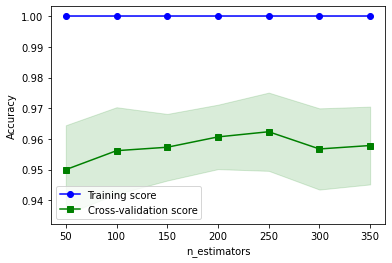

In [343]:
from sklearn.model_selection import validation_curve
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier

# Задаем диапазон значений параметра n_estimators
param_range = np.arange(50, 400, 50)

# Создаем экземпляр модели градиентного бустинга
model = GradientBoostingClassifier()

# Вычисляем значения метрики для тренировочного и тестового наборов данных при различных значениях n_estimators
train_scores, test_scores = validation_curve(
    model, X_train, y_train, param_name="n_estimators", param_range=param_range, cv=5
)

# Среднее значение и стандартное отклонение оценок качества на тренировочном и тестовом наборах данных
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Построение кривых валидации
plt.plot(param_range, train_mean, label="Training score", color="blue", marker="o")
plt.fill_between(
    param_range,
    train_mean + train_std,
    train_mean - train_std,
    alpha=0.15,
    color="blue",
)
plt.plot(param_range, test_mean, label="Cross-validation score", color="green", marker="s")
plt.fill_between(
    param_range,
    test_mean + test_std,
    test_mean - test_std,
    alpha=0.15,
    color="green",
)
plt.legend(loc="best")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.show()


In [17]:
import numpy
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=250, learning_rate=0.1, max_depth=3, random_state=0, max_features='sqrt')
clf = clf.fit(X_train, y_train)
x_predict = clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(numpy.array(y_test).reshape(-1), x_predict)

0.9685393258426966

In [18]:
import pickle
with open('clf.pickle', 'wb') as f:
    pickle.dump(clf, f)